# Visual Exploration

The best way to get a sense of data is to **plot it.** Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [3]:
import pandas as pd

unemployment = pd.read_csv('../data/country_total.csv')
countries = pd.read_csv("../data/countries.csv")
country_names = countries[['country', 'country_group', 'name_en']]
unemployment = pd.merge(unemployment, country_names, on='country')

# Clean up dates
unemployment['year'] = unemployment.month.astype(int)
unemployment['year_month'] = unemployment.month
# Month from last two numbers to int
unemployment['month'] = (
    unemployment.month
    .astype(str)
    .str.slice(-2,)
    .str.replace(".", "")
    .astype(int)
)
# Re-order
# Note the preferred way of writing chained-ops
# Instead of two unemployment = statements
unemployment = (unemployment
    .sort_values(['name_en', 'year_month'])
    .reset_index(drop=True)
)
unemployment

C:\Users\Simona\AppData\Local\Temp\ipykernel_6152\1560398432.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unemployment.month


,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year,year_month
0,at,nsa,1,171000,4.5,eu,Austria,1993,1993.01
1,at,sa,1,144000,3.8,eu,Austria,1993,1993.01
2,at,trend,1,144000,3.8,eu,Austria,1993,1993.01
3,at,nsa,2,175000,4.6,eu,Austria,1993,1993.02
4,at,sa,2,145000,3.8,eu,Austria,1993,1993.02
...,...,...,...,...,...,...,...,...,...
20791,uk,sa,9,2449000,7.8,eu,United Kingdom,2010,2010.09
20792,uk,trend,9,2447000,7.8,eu,United Kingdom,2010,2010.09
20793,uk,nsa,1,2474000,7.9,eu,United Kingdom,2010,2010.10
20794,uk,sa,1,2457000,7.8,eu,United Kingdom,2010,2010.10


Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

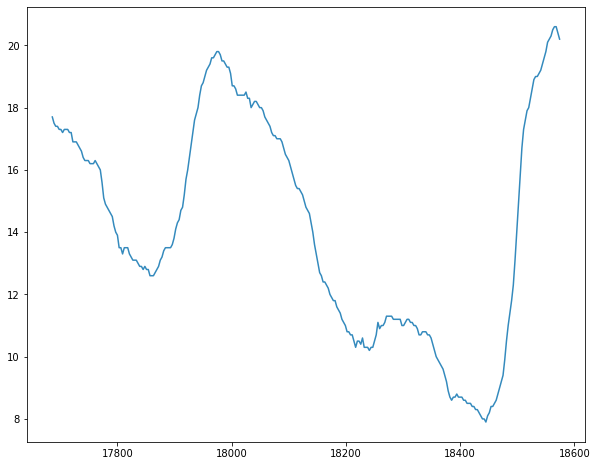

In [5]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]

spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD');

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could **show the time period** associated with the various unemployment rates for Spain? It might also be interesting to **compare** Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [7]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]
ps

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year,year_month
14986,pt,sa,1,345000,7.5,eu,Portugal,1983,1983.01
14989,pt,sa,2,348000,7.6,eu,Portugal,1983,1983.02
14992,pt,sa,3,353000,7.7,eu,Portugal,1983,1983.03
14995,pt,sa,4,359000,7.9,eu,Portugal,1983,1983.04
14998,pt,sa,5,366000,8.0,eu,Portugal,1983,1983.05
...,...,...,...,...,...,...,...,...,...
18562,es,sa,8,4739000,20.5,eu,Spain,2010,2010.08
18565,es,sa,9,4773000,20.6,eu,Spain,2010,2010.09
18568,es,sa,1,4758000,20.6,eu,Spain,2010,2010.10
18571,es,sa,11,4723000,20.4,eu,Spain,2010,2010.11


Next, we'll **generate time series data** by converting our years and months into `datetime` objects. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime`. (Note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).) If we were interested in March 23, 1868, for example, we could do the following.

In [8]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. As a result, we pass in a valid string format.

In [9]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

In [10]:
ps.insert(loc=0, column='date',
          value=pd.to_datetime(
              ps['year'].astype(str) 
              + '/' 
              + ps['month'].astype(str) 
              + '/1'))

In [11]:
ps

,date,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year,year_month
14986,1983-01-01,pt,sa,1,345000,7.5,eu,Portugal,1983,1983.01
14989,1983-02-01,pt,sa,2,348000,7.6,eu,Portugal,1983,1983.02
14992,1983-03-01,pt,sa,3,353000,7.7,eu,Portugal,1983,1983.03
14995,1983-04-01,pt,sa,4,359000,7.9,eu,Portugal,1983,1983.04
14998,1983-05-01,pt,sa,5,366000,8.0,eu,Portugal,1983,1983.05
...,...,...,...,...,...,...,...,...,...,...
18562,2010-08-01,es,sa,8,4739000,20.5,eu,Spain,2010,2010.08
18565,2010-09-01,es,sa,9,4773000,20.6,eu,Spain,2010,2010.09
18568,2010-01-01,es,sa,1,4758000,20.6,eu,Spain,2010,2010.10
18571,2010-11-01,es,sa,11,4723000,20.4,eu,Spain,2010,2010.11


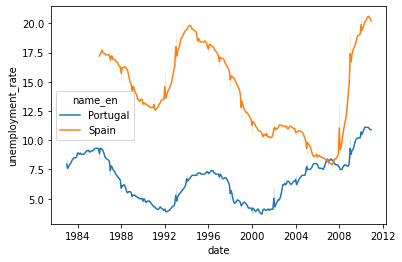

In [14]:
import seaborn as sns

# Notice the indices from pivoting the table
sns.lineplot(
    x='date',
    y='unemployment_rate',
    hue='name_en',
    data=ps
);

In [15]:
unemployment

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year,year_month
0,at,nsa,1,171000,4.5,eu,Austria,1993,1993.01
1,at,sa,1,144000,3.8,eu,Austria,1993,1993.01
2,at,trend,1,144000,3.8,eu,Austria,1993,1993.01
3,at,nsa,2,175000,4.6,eu,Austria,1993,1993.02
4,at,sa,2,145000,3.8,eu,Austria,1993,1993.02
...,...,...,...,...,...,...,...,...,...
20791,uk,sa,9,2449000,7.8,eu,United Kingdom,2010,2010.09
20792,uk,trend,9,2447000,7.8,eu,United Kingdom,2010,2010.09
20793,uk,nsa,1,2474000,7.9,eu,United Kingdom,2010,2010.10
20794,uk,sa,1,2457000,7.8,eu,United Kingdom,2010,2010.10


# Scatterplot Matrix to explore data

The scatterplot matrix (AKA pairplot) is a great way to explore datasets.

It gives a view into multiple metrics (numeric features), with color on one categorical feature.

How do we read this plot?

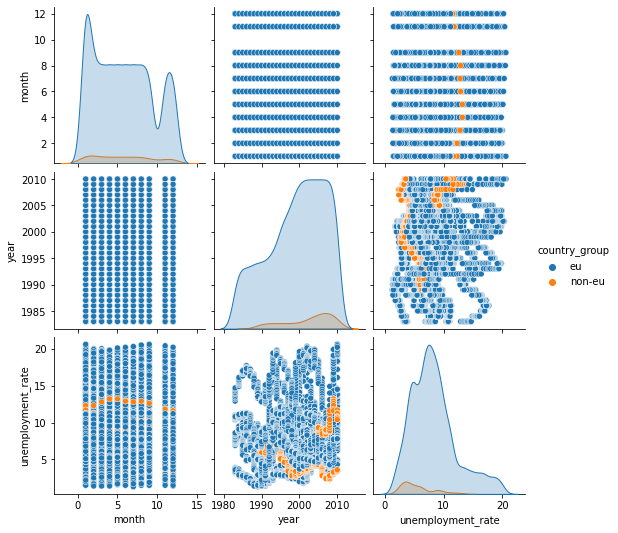

In [17]:
plotting_cols=[
    'month', 'year', 'unemployment_rate',
    'country_group'
]

sns.pairplot(
    hue='country_group',
    data=unemployment.loc[
        unemployment.seasonality == 'sa', 
        plotting_cols
    ]
);

Not much!

We see most countries are in the EU, most countries have their own lines/trends (see bottom middle plot)

Let's find the most interesting countries and re-plot:

In [21]:
vc = unemployment.country.value_counts()[:10]
vc

ie    1008
se    1008
es    1008
pt    1008
dk    1008
nl    1008
fr    1008
lu    1008
be    1008
uk    1002
Name: country, dtype: int64

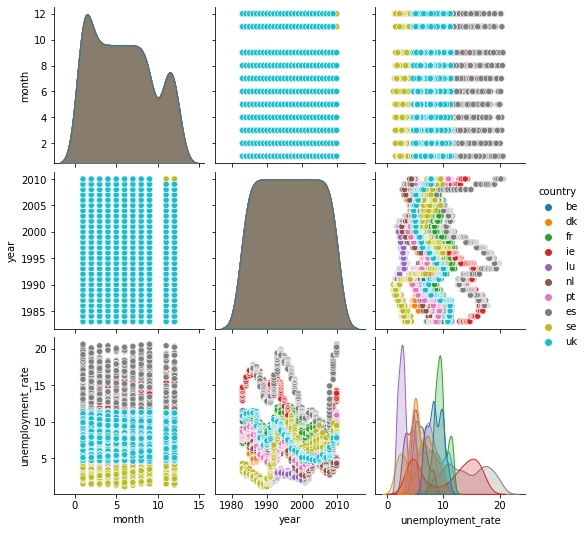

In [22]:
plotting_cols=[
    'month', 'year', 'unemployment_rate',
    'country'
]

sns.pairplot(
    hue='country',
    data=unemployment.loc[
        # Pull top 10 countries from value counts
        unemployment.country.isin(vc.index),
        plotting_cols
    ]
);

Now we see that each country should be analyzed **individually**, because they're all on their own trendlines, clearly.

In [ ]:
# Separate into multiple distributions if distribution is abnormal, x.iloc[111:1111]